In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
import random
import math

In [2]:
input_layer_size=400
num_labels=10
print('Loading and Visualizing Data...')
data=sio.loadmat('c:\python\ex3data1.mat')
X=data['X']
y=data['y']
y=y.ravel()
y.shape
X.shape
y[:10]

Loading and Visualizing Data...


array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=uint8)

In [3]:
m=X.shape[0]
rand_indices=np.arange(m)
random.shuffle(rand_indices)
sel=X[rand_indices[0:100,],:]
print(sel.shape)

(100, 400)


In [4]:
def displayData(X, example_width=0):
    if example_width==0:
        example_width=round(np.sqrt(X.shape[1]))
    
    m,n=X.shape
    example_height=int(n/example_width)
    example_width=int(example_width)
    
    display_rows=math.floor(np.sqrt(m))
    display_cols=math.ceil(m/display_rows)
    
    pad=1
    
    display_array=np.ones((pad + display_rows * (example_height+pad), pad + display_cols * (example_width+pad)))
    
    curr_ex=0
    
    for j in np.arange(display_rows, dtype=int):
        for i in np.arange(display_cols,dtype=int):
            if curr_ex >= m:
                break;
            max_val = np.max(np.abs(X[curr_ex,:]))
            x = pad + j * (example_height + pad)
            y = pad + i * (example_width + pad)
            
            display_array[x: x + example_height, y: y + example_width] = \
                X[curr_ex,:].reshape((example_height, example_width)).T/max_val;
            curr_ex = curr_ex + 1
            
            if curr_ex >= m:
                break
    plt.set_cmap('gray')
    im=plt.imshow(display_array)
    plt.axis('off')

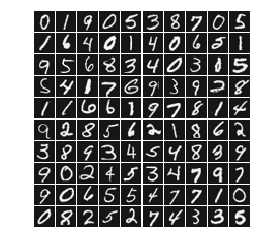

In [5]:
displayData(sel)

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(z))

In [7]:
def lrCostFunction(theta,X,y,s_lambda):
    m,n=X.shape
    J=0
    grad=np.zeros(np.size(theta))
    sum_theta_square=np.sum(theta[1:]**2)
    X_theta=X.dot(theta)
    prediction = sigmoid(X_theta)
    
    J = 1/m*np.sum(-y*np.log(prediction)-(1-y)*np.log(1-prediction))\
        + s_lambda/(2*m)*sum_theta_square
    
    error = prediction - y
    delta = 1/m * error.T.dot(X)
    
    temp = theta
    temp[0]=0
    regular = (s_lambda / m) * temp
    grad = delta = regular
    
    return J, grad

In [8]:
#TEST

theta1 = np.array([-2,-1,1,2])
X1=np.array([[1,8,1,6],[1,3,5,7],[1,4,9,2]])
y1=np.array([1,0,1])
y2=(y1 >= 0.5)
print(y2.astype(int))
s_lambda1=3
J, grad = lrCostFunction(theta1,X1,y2.astype(int),s_lambda1)
print(J, grad)


[1 0 1]
6.34983321651863 [ 0. -1.  1.  2.]


In [9]:
import scipy.optimize as op
from ex2func import *

def oneVsAll(X,y,num_labels,s_lambda):
    m,n=X.shape
    all_theta=np.zeros((num_labels,n+1))
    X=np.hstack((np.ones((m,1)),X))
    costFunc = lambda p: lrCostFunction(p,X,y2.astype(int),s_lambda)[0]
    gradFunc = lambda p: lrCostFunction(p,X,y2.astype(int),s_lambda)[1]
    
    for c in np.arange(num_labels):
        c=c+1
        initial_theta = np.zeros(n+1)
        y2 = (y==c)
        Result = op.minimize(fun=costFunc, x0=initial_theta,args=(X,y2.astype(int),s_lambda),method='CG',jac=gradFunc, options={'maxiter':50})
        all_theta[c-1,:]=Result.x
        print(all_theta)
    return all_theta
        

In [10]:
s_lambda=0.1
all_theta=oneVsAll(X,y,num_labels,s_lambda)
print(all_theta[0,0:5])

TypeError: <lambda>() takes 1 positional argument but 4 were given

In [ ]:
def predictOVA(all_theta,X):
    m=X.shape[0]
    num_labels=all_theta.shape[0]
    p=np.zeros(m)
    X=np.hstack((np.ones((m,1)),X))
    prediction=sigmoid(X.dot(all_theta.T))
    p=np.argmax(prediction,axis=1)
    p=p+1
    return p

In [ ]:
pred=predictOVA(all_theta,X)
print('Training set Accuracy: %s' %mean(double(pred==y)*100))

In [11]:
input_layer_size=400
hidden_layer_size=25
num_labels=10
weights=sio.loadmat('c:\python\ex3weights.mat')
theta1=weights['Theta1']
theta2=weights['Theta2']

In [12]:
print(theta1.shape,theta2.shape)

(25, 401) (10, 26)


In [13]:
def predict(theta1,theta2,X):
    m=X.shape[0]
    p=np.zeros(m)
    X=np.hstack((np.ones((m,1)),X))
    z=X.dot(theta1.T)
    a2=sigmoid(z)
    a2=np.hstack((np.ones((a2.shape[0],1)),a2))
    z=a2.dot(theta2.T)
    a3=sigmoid(z)
    p=np.argmax(a3,axis=0)
    p=p+1
    return p

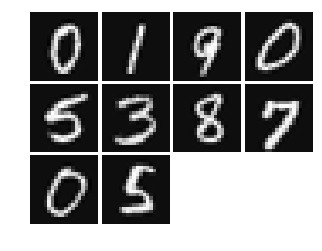

NNP: [ 2  7  6  3  5 10  8  7  3  9] (digit [10  1  9 10  5  3  8  7 10  5])


In [14]:
idx=rand_indices[:10]
displayData(X[idx,:])
plt.show()
pred=predict(theta1,theta2,X[idx,:])
print('NNP: %s (digit %s)' % (pred,y[idx]))

In [15]:
type(X[idx,:])

numpy.ndarray

In [16]:
pred=predict(theta1,theta2,X)
print(np.mean(np.double(pred==y))*100)

0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [17]:
X[None]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [18]:
X[None].shape

(1, 5000, 400)

In [20]:
X.shape

(5000, 400)